<a href="https://colab.research.google.com/github/JNarimatsu/Bootcamp_Avanti_2025.3/blob/main/Entrega_01_analise_exploratoria_de_dados_XI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA — Laptop Price (Atlântico Academy)
**Squad:** The Outliers              
**Turma:** 2025.3  
**Integrantes:** Ana Kessya, Anajara Lucas, Daniel Gomes, Evellyn Pereira, Juliana Narimatsu, Rogério Carmo.   
**Dataset:** `laptop_price.csv` (Atlântico Academy)  
**Objetivo:** Entendimento dos dados (CRISP-DM) para analisar padrões e fatores ligados ao preço de laptops.

## Preparação
 - Carregamento de bibliotecas
 - Configuração de estilo dos gráficos
 - Leitura do conjunto de dados

In [45]:
import itertools
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Markdown


In [46]:
# @title Leitura do conjunto de dados
df_prices_latop = pd.read_csv(
    'https://raw.githubusercontent.com/atlantico-academy/datasets/main/laptop_price.csv', encoding='latin-1', sep=','
)

In [47]:
# @title Informações iniciais
display(Markdown("### Primeiras linhas"))
display(df_prices_latop.head())

display(Markdown("### Ultimas linhas"))
display(df_prices_latop.tail())

display(Markdown("### Informação das variáveis"))
df_prices_latop.info()

display(Markdown("### Quantidade de valores únicos"))
df_prices_latop.nunique()

### Primeiras linhas

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


### Ultimas linhas

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0


### Informação das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


### Quantidade de valores únicos

,0
laptop_ID,1303
Company,19
Product,618
TypeName,6
Inches,18
ScreenResolution,40
Cpu,118
Ram,9
Memory,39
Gpu,110


In [48]:
# @title Dicionário de dados
df_dict_prices = pd.DataFrame([
    {
        "variavel": "laptop_ID",
        "descricao": "Identificação do laptop",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "Company",
        "descricao": "Fabricante do laptop",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "Product",
        "descricao": "Modelo do laptop",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "TypeName",
        "descricao": "Tipo de Laptop",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "Inches",
        "descricao": "Polegadas",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "ScreenResolution",
        "descricao": "Polegadas da tela",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "Cpu",
        "descricao": "Qual cpu utilizada no laptop",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
     {  # A princípio Ram e Memoria foram classificadas como qualitativas doscretas, mas foi verificado que para as análises fazia mais sentido classificadas como qualitativas ordinais.
        "variavel": "Ram",
        "descricao": "Quantidade de memória ram em gigas",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "Memory",
        "descricao": "Quantidade de memória em gigas",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "Gpu",
        "descricao": "Qual gpu utilizada no laptop",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "OpSys",
        "descricao": "Qual sistema operacional o laptop utiliza",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
      "variavel": "Weight",
        "descricao": "Peso do laptop",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "Price_euros",
        "descricao": "Preço do laptop",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    }
])
display(Markdown("###Dicionário de dados"))
display(df_dict_prices)

display(Markdown('### Tipos de dados'))
display(df_dict_prices.value_counts(["tipo","subtipo"]).rename("qtde").reset_index())

###Dicionário de dados

,variavel,descricao,tipo,subtipo
0,laptop_ID,Identificação do laptop,quantitativa,discreta
1,Company,Fabricante do laptop,qualitativa,nominal
2,Product,Modelo do laptop,qualitativa,nominal
3,TypeName,Tipo de Laptop,qualitativa,nominal
4,Inches,Polegadas,quantitativa,contínua
5,ScreenResolution,Polegadas da tela,qualitativa,ordinal
6,Cpu,Qual cpu utilizada no laptop,qualitativa,ordinal
7,Ram,Quantidade de memória ram em gigas,qualitativa,ordinal
8,Memory,Quantidade de memória em gigas,qualitativa,ordinal
9,Gpu,Qual gpu utilizada no laptop,qualitativa,ordinal


### Tipos de dados

,tipo,subtipo,qtde
0,qualitativa,ordinal,5
1,qualitativa,nominal,4
2,quantitativa,contínua,3
3,quantitativa,discreta,1


In [49]:
#Transformando a variável em float, "regex" pega apenas a parte numérica e transforma em float
df_prices_latop['Weight'] = df_prices_latop['Weight'].str.replace("kg", "", regex=False).astype(float)

df_prices_latop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 132.5+ KB


---
A partir das informações iniciais, podemos dizer que:
 - O conjunto de dados tem 1303 unidades amostrais com 13 variáveis
 - Classificação das variáveis:
    - Quantitativa contínua: `inches(polegadas)`, `Weight (Peso)`, `Price-euros`
    - Quantitativa discreta: `laptop_ID`
    - Qualitativa nominal: `Company`, `Product`, `TypeName`, `OpSys`,
    - Qualitativa ordinal: `ScreenResolution`, `Cpu`,  `Ram`, `Memory`, `Gpu`
---

## Descrição dos dados

## Análise univariada

In [50]:
# @title Resumo estatístico

#display(Markdown("### Variáveis qualitativas"))
#display(Markdown("### Variáveis quantitativas"))
num_cols = df_prices_latop.select_dtypes(include=["number"]).columns.tolist() #Identifica as colunas numéricas no DataFrame / .tolist() - converte os nomes das colunas em uma lista Python.
cat_cols = [c for c in df_prices_latop.columns if c not in num_cols] #Criando uma lista apenas com as colunas que não estão presentes na lista num_cols, somente com as colunas qualitativas.


display(Markdown("### Estatísticas descritivas — quantitativas"))
if num_cols:
    display(df_prices_latop[num_cols].describe().T)

display(Markdown("### Tabelas de frequência — qualitativas (top 10)"))
for c in cat_cols:
    vc = df_prices_latop[c].value_counts(dropna=False).head(10)
    display(vc.to_frame(name="contagem"))




### Estatísticas descritivas — quantitativas

,count,mean,std,min,25%,50%,75%,max
laptop_ID,1303.0,660.155794,381.172104,1.00,331.5,659.00,990.50,1320.0
Inches,1303.0,15.017191,1.426304,10.10,14.0,15.60,15.60,18.4
Weight,1303.0,2.038734,0.665475,0.69,1.5,2.04,2.30,4.7
Price_euros,1303.0,1123.686992,699.009043,174.00,599.0,977.00,1487.88,6099.0


### Tabelas de frequência — qualitativas (top 10)

,contagem
Company,
Dell,297
Lenovo,297
HP,274
Asus,158
Acer,103
MSI,54
Toshiba,48
Apple,21
Samsung,9


,contagem
Product,
XPS 13,30
Inspiron 3567,29
250 G6,21
Vostro 3568,19
Legion Y520-15IKBN,19
Inspiron 5570,18
ProBook 450,18
Alienware 17,15
Inspiron 5567,14


,contagem
TypeName,
Notebook,727
Gaming,205
Ultrabook,196
2 in 1 Convertible,121
Workstation,29
Netbook,25


,contagem
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


,contagem
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
Intel Core i5 6200U 2.3GHz,68
Intel Core i3 6006U 2GHz,64
Intel Core i7 6500U 2.5GHz,49
Intel Core i7 6700HQ 2.6GHz,43


,contagem
Ram,
8GB,619
4GB,375
16GB,200
6GB,41
12GB,25
2GB,22
32GB,17
24GB,3
64GB,1


,contagem
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


,contagem
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
Nvidia GeForce 940MX,43
AMD Radeon 530,41
Intel HD Graphics 500,39
Intel HD Graphics 400,37


,contagem
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


---
 - `Dell` e `Lenovo` são as fabricantes mais frequentes, e o modelo `Dell` `XPS 13` sendo o mais frequente.
 - A configuração mais comum é uma CPU `Intel Core i5 7200U 2.5GHz`, `8GB ` de Ram, `256GB ` de memória SSD com uma GPU `Intel HD Graphics 620`.
 - O sistema operacional mais utilizado é o `Windows 10`
 - O peso médio é `2.038kg`.
 - A média de tamanho de tela é de `15 polegadas` com o menor tendo `10.10 polegadas` e o maior `18.4 polegadas`
 - O preço médio é de `1123.68 euros` variando de `174.00` a `6099.00` euros

---

In [51]:
df_prices_latop["Company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

### Distribuição de variáveis

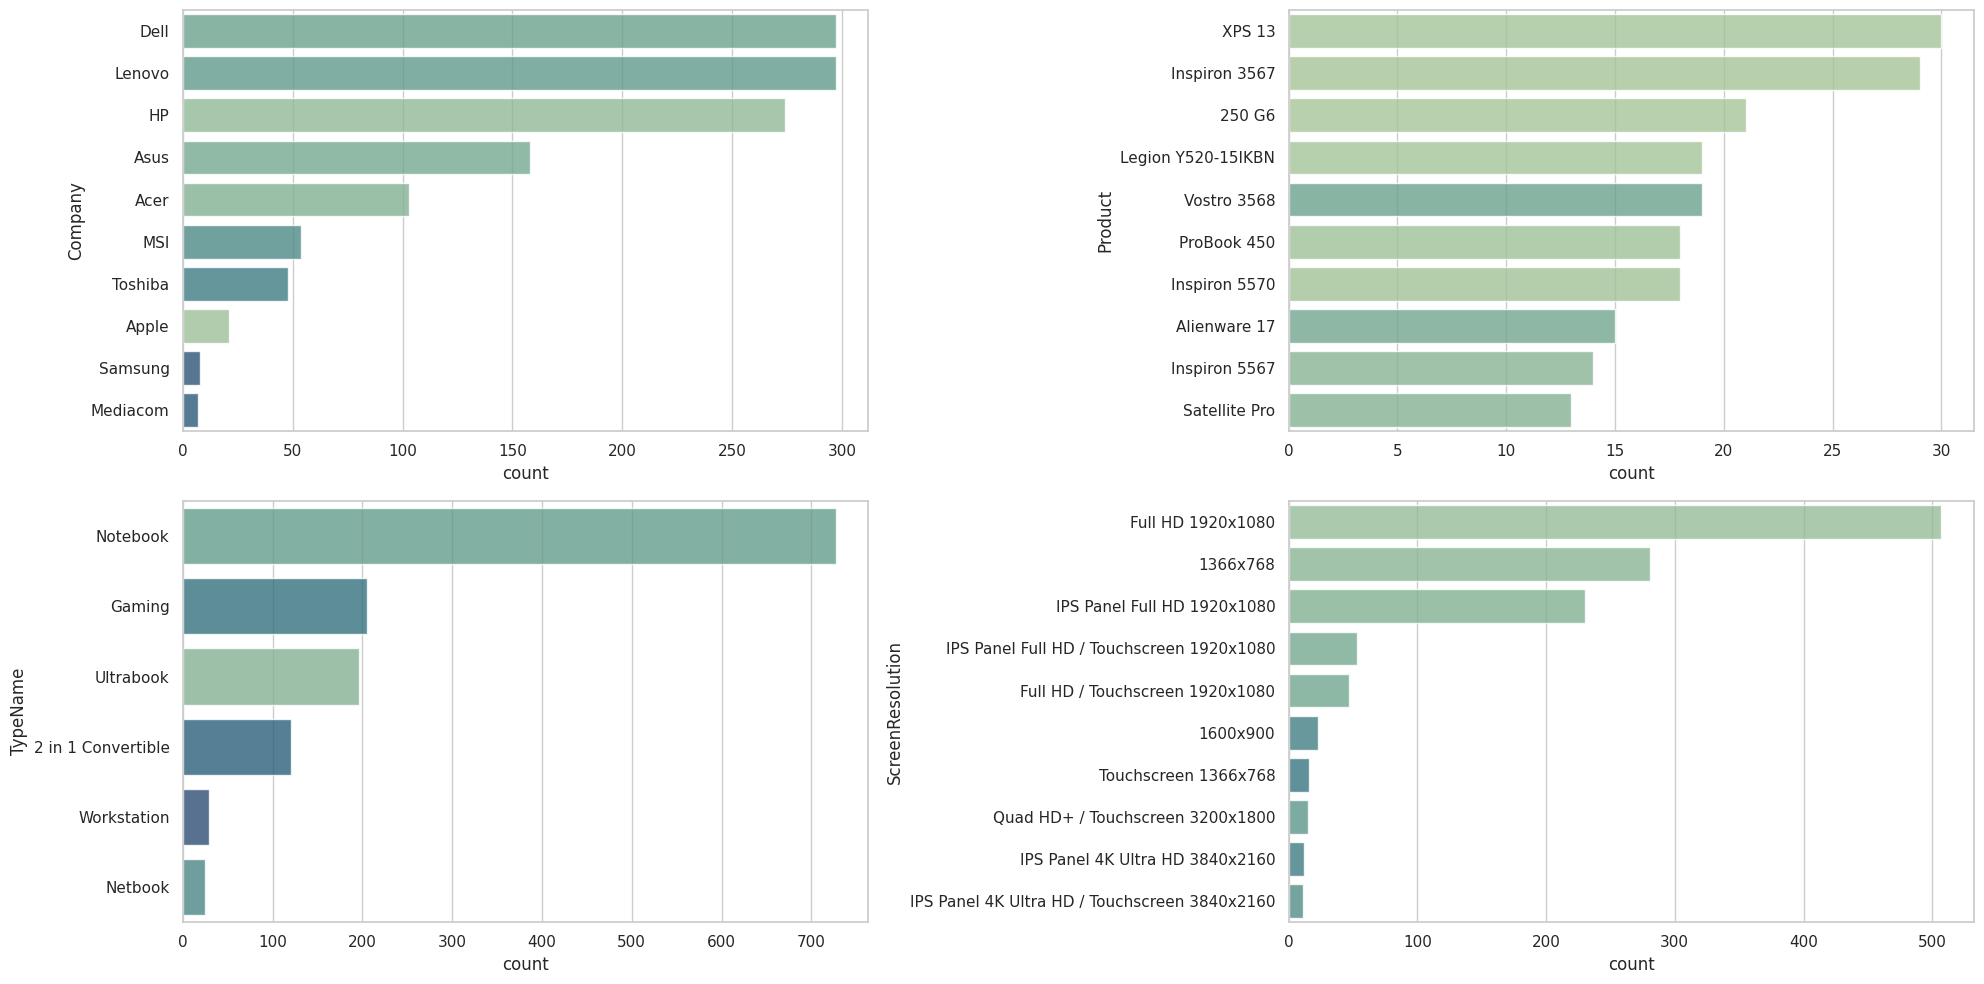

In [114]:
# @title Variáveis qualitativas
variaveis_qualitativas = df_dict_prices.query("tipo == 'qualitativa'").variavel.to_list()


variaveis_para_plotar = variaveis_qualitativas[:4]

fig, axes = plt.subplots(figsize=(20, 10), ncols=2, nrows=2)
axes = axes.flatten()

for i, variavel in enumerate(variaveis_para_plotar):
    order = df_prices_latop[variavel].value_counts().index[:10]
    aax = sns.countplot(df_prices_latop, y=variavel, hue=variavel, ax=axes[i], order=order, alpha=.8, palette='crest', legend=False)
    ax.bar_label(ax.containers[0], fmt="%d", color="white", label_type="center")
    ax.set(title=f"Distribuição da variável {variavel}", xlabel="Quantidade")
    for side in ["bottom", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax.spines["left"].set_color("black")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout();
plt.show()



---
 - As três fabricantes mais frequentes são Dell(297), Lenovo(297) e HP (274) ;
 - Dos 10 modelos mais frequentes, 06 são da fabricante `Dell` sendo eles: `XPS 13`(30), `Inspiron 3567`(29), `Vostro 3568` (19), `Inspiron 5570`(18),  `Alienware 17`(15), `Inspiron 5567`(14) ;
 - Notebooks Aparecem com maior frequencia entre os tipos de laptops
 - A resolusão de tela mais frequencia é  `Full HD 1920x1080`
---

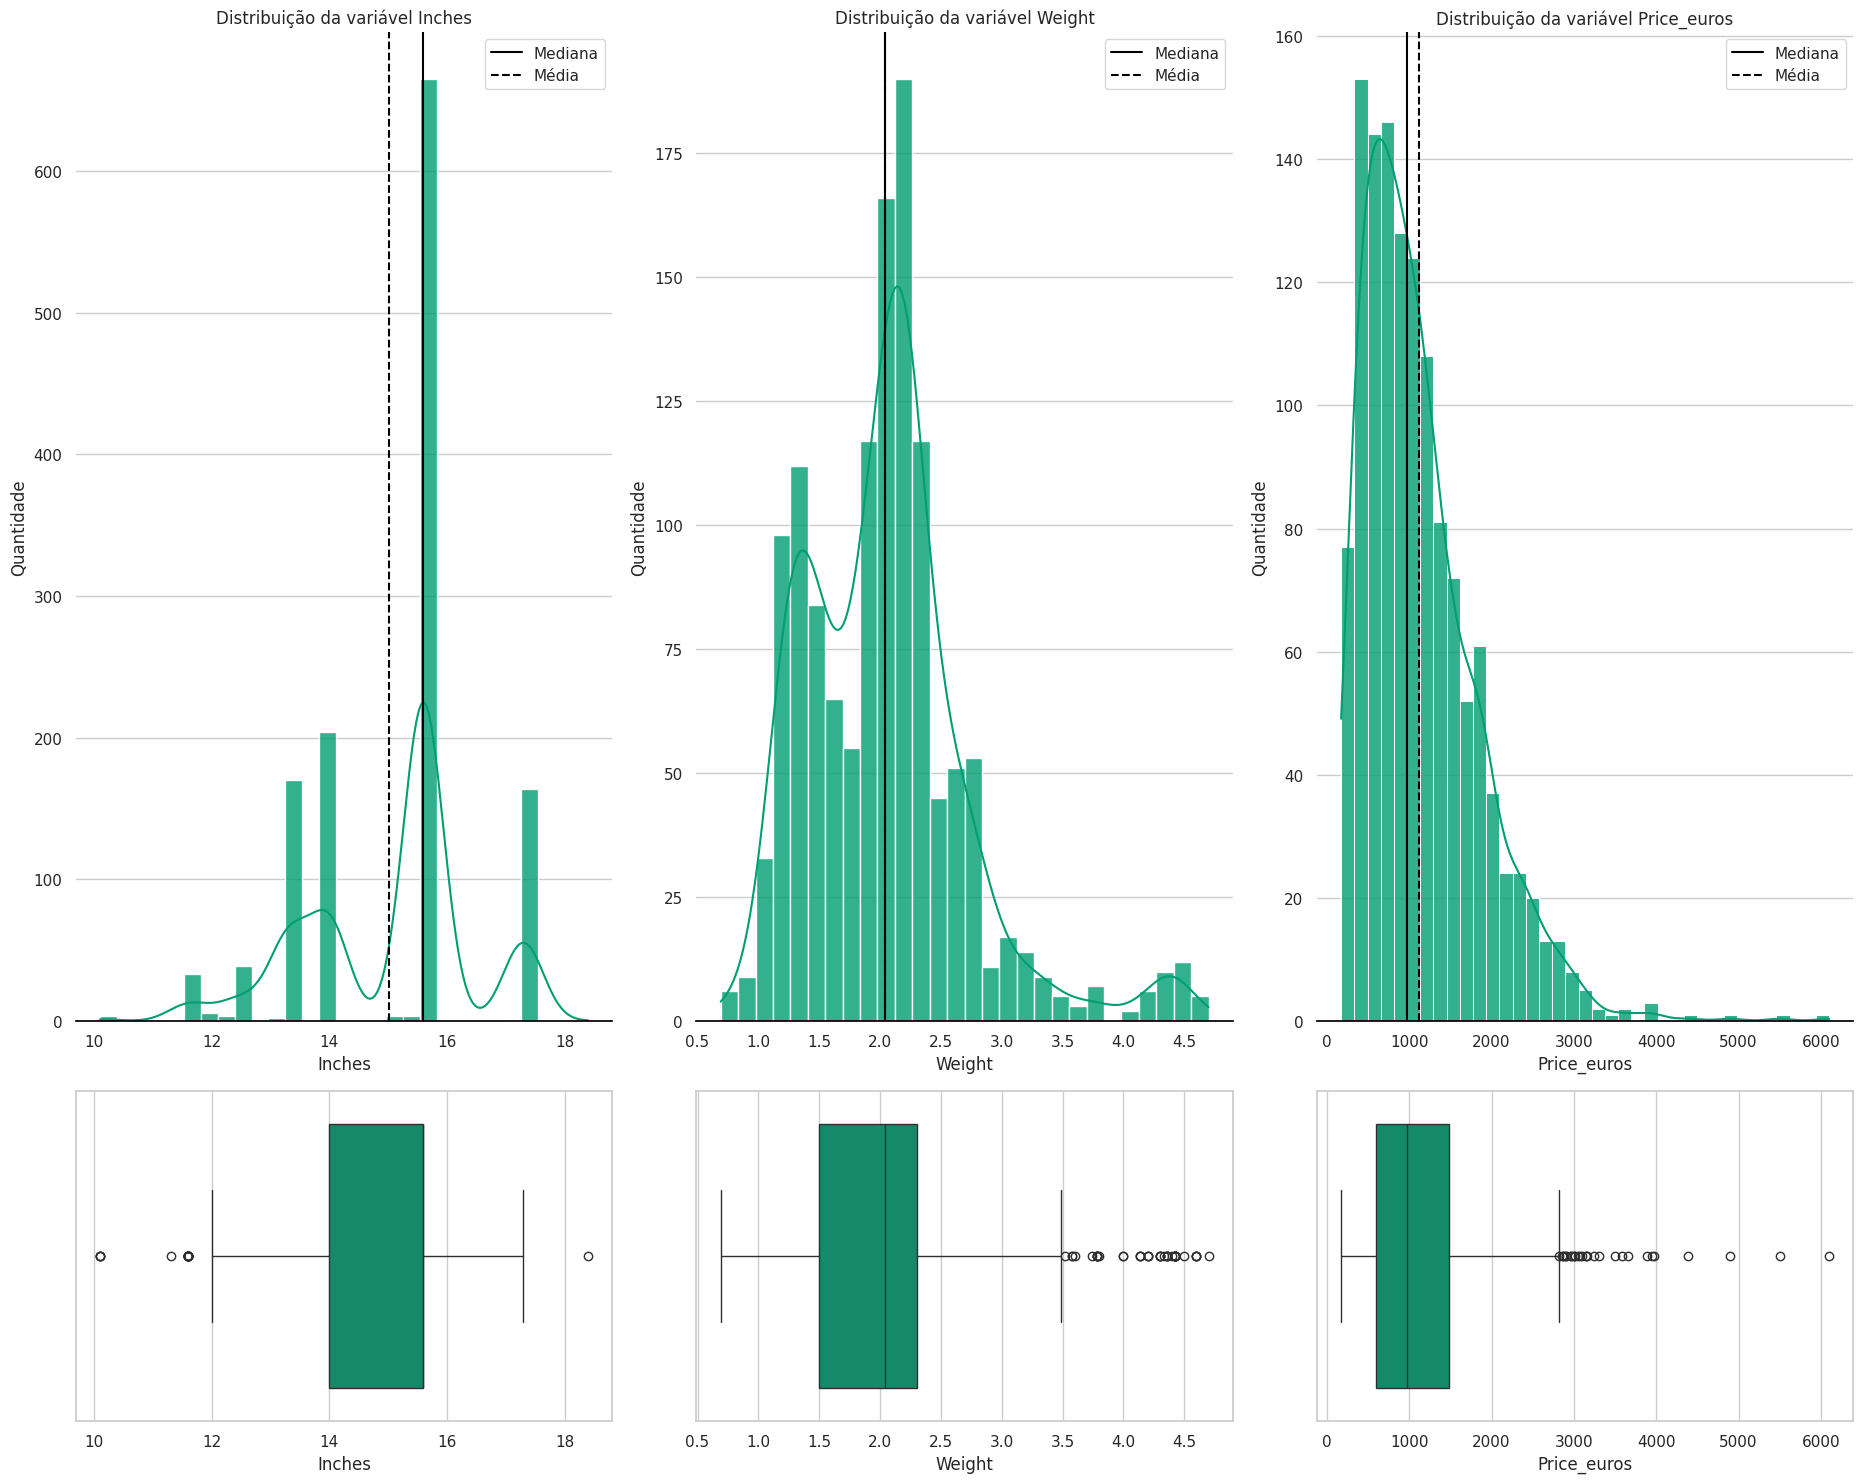

In [87]:
# @title Variáveis quantitativas
variaveis_quantitativas = df_dict_prices.query("tipo == 'quantitativa'").variavel.to_list()
variaveis_quantitativas = [v for v in variaveis_quantitativas if v != 'laptop_ID']


fig, axes = plt.subplots(figsize=(25, 15), ncols=4, nrows=2, gridspec_kw={"height_ratios": [3, 1]})
axes = axes.flatten()

ncols = 4

for i, variavel in enumerate(variaveis_quantitativas):
    ax = sns.histplot(data=df_prices_latop, x=variavel, ax=axes[i], kde=True, alpha=.8, color='#009E73')
    ax.axvline(df_prices_latop[variavel].median(), color="black", label="Mediana")
    ax.axvline(df_prices_latop[variavel].mean(), color="black", linestyle="--", label="Média")
    ax.set(title=f"Distribuição da variável {variavel}", ylabel="Quantidade")
    ax.legend()
    ax.spines["bottom"].set_color("black")
    ax.grid(False, axis="x")
    for side in ["left", "top", "right"]:
        ax.spines[side].set_visible(False)

    ax = sns.boxplot(data=df_prices_latop, x=variavel, ax=axes[i + ncols], color='#009E73')
    ax.set(xlabel=variavel)


fig.delaxes(axes[3])
fig.delaxes(axes[7])


plt.tight_layout()
plt.show()

In [54]:
mediana_prices = df_prices_latop['Price_euros'].median()
display(Markdown("### Mediana da variável `Price_euros`"))
print(mediana_prices)

### Mediana da variável `Price_euros`

977.0


In [55]:
moda_price = df_prices_latop['Price_euros'].mode()
display(Markdown("### Moda da vaviável `Price_euros`"))
display(moda_price)

### Moda da vaviável `Price_euros`

,Price_euros
0,1099.0
1,1499.0
2,1799.0


In [56]:
media_prices = df_prices_latop['Price_euros'].mean()
display(Markdown("### Média da variável `Price_euros`"))
print(media_prices)

### Média da variável `Price_euros`

1123.6869915579432


---
Distribuição da variável `inches`
 - Os tamanhos de tela mais frequentes estão entre 14" e 15"
 - Temos menos frequência entre telas de 10" a 12" e 18"

Distribuição da variável `Weight`
 - A maior parte dos pesos estão entre 1.5 e 2.0
 - A pertir de 3.5 até 4.5 a frequencia é menor

 Distribuição da variável `Price_euros`
- Os preços mais comuns estão abaixo de 2000.00 euros
- a partir de 3000.00 euros a frenquencia é menor e vai dimuindo até o preço maximo, de pouco mais de 6000.00 euros, o que foi interpretado como outliers.
- As modas para essa variável são 1099.0, 1499.0 e 1799.0 euros.
---

### Dados faltantes

In [57]:
df_prices_latop.isnull().sum()

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


---

Não existem dados faltantes

---

## Análise bivariada

### Relação entre variáveis quantitativas

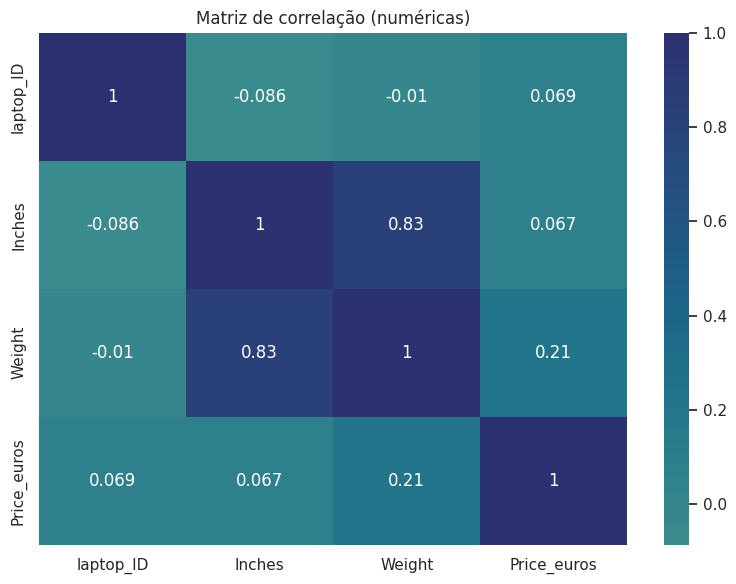

In [90]:
# @title Comportamento par a par

# Correlações (numéricas)
num_cols = df_prices_latop.select_dtypes(include=["number"]).columns.tolist()
num = df_prices_latop[num_cols].dropna(axis=1, how="all")

if not num.empty:
    plt.figure(figsize=(8,6))
    sns.heatmap(num.corr(numeric_only=True), annot=True, cmap="crest", center=0)
    plt.title("Matriz de correlação (numéricas)")
    plt.tight_layout(); plt.show()

---
 - Existe uma forte relação entre as variáveis `inches` e `weight`(~0.8-0.9) o que faz  sentido pois quanto mais a tela, mais pesado tende a ser o laptop.
 - A variável `weigth` e a variável `princes_euros`tem uma correlação moderada (~0.3-0.4) indicando que laptop mais pesados tendem a ser um pouco mais caros , mas não é uma relação forte.
 - A relação entre as variáveis `inches` e `princes_euros` tem uma correlação fraca (~0.1-0.2) Tamanho da tela quase não explica o preço diretamente.
---

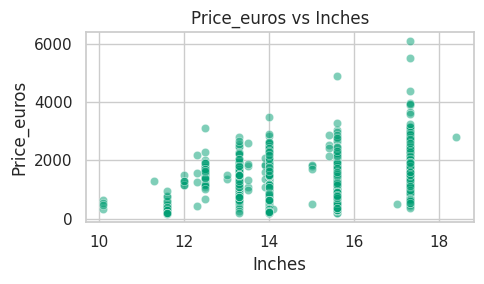

In [92]:
# @title Dispersão preço em relação a tamanho da tela (Prices_euros x Inches)
y = "Price_euros" if "Price_euros" in df_prices_latop.columns else None
targets = [c for c in ["Inches","PPI","Ram_GB","Weight_kg","Width_px","Height_px"] if c in df_prices_latop.columns]

if y:
    for c in targets:
        plt.figure(figsize=(5,3))
        sns.scatterplot(data=df_prices_latop, x=c, y=y, alpha=0.5, color='#009E73')
        plt.title(f"{y} vs {c}"); plt.tight_layout(); plt.show()

---
 - Laptops com telas maiores tendem a aparecer em faixas de preço mais altas.   Mas a relação não é forte: há laptops de 13" e 14" com preços bem altos, e laptops grandes que não são tão caros.
 - Para cada tamanho de tela, os preços variam bastante. Isso sugere que outros fatores (processador, RAM, marca, placa de vídeo, etc.) são mais determinantes no preço do que apenas o tamanho da tela.
 - Existem alguns notebooks com preços muito acima da média (acima de 5000 euros). Esses provavelmente são modelos premium/gamer ou estações de trabalho.
---

In [60]:
# @title Tratando a variável CPU
def extract_cpu_brand(cpu):
  cpu = cpu.lower()
  if 'intel' in cpu:
    if 'i3' in cpu:
      return 'Intel Core i3'
    elif 'i5' in cpu:
      return 'Intel Core i5'
    elif 'i7' in cpu:
      return 'Intel Core i7'
    else:
      return 'Intel Core'
  elif 'amd' in cpu:
    return 'AMD'
  else:
    return 'Outros'
df_prices_latop['CPU_Brand'] = df_prices_latop['Cpu'].apply(extract_cpu_brand)
df_prices_latop.drop(columns=['Cpu'], inplace=True)
df_prices_latop['CPU_Brand'].value_counts()

,count
CPU_Brand,
Intel Core i7,527
Intel Core i5,423
Intel Core,154
Intel Core i3,136
AMD,62
Outros,1


Tivemos apenas uma linha com `outros`, não ficaria interessante análise por isso iremos remover a linha.

In [61]:
df_prices_latop = df_prices_latop[df_prices_latop['CPU_Brand'] != 'Outros']
df_prices_latop['CPU_Brand'].value_counts()

,count
CPU_Brand,
Intel Core i7,527
Intel Core i5,423
Intel Core,154
Intel Core i3,136
AMD,62


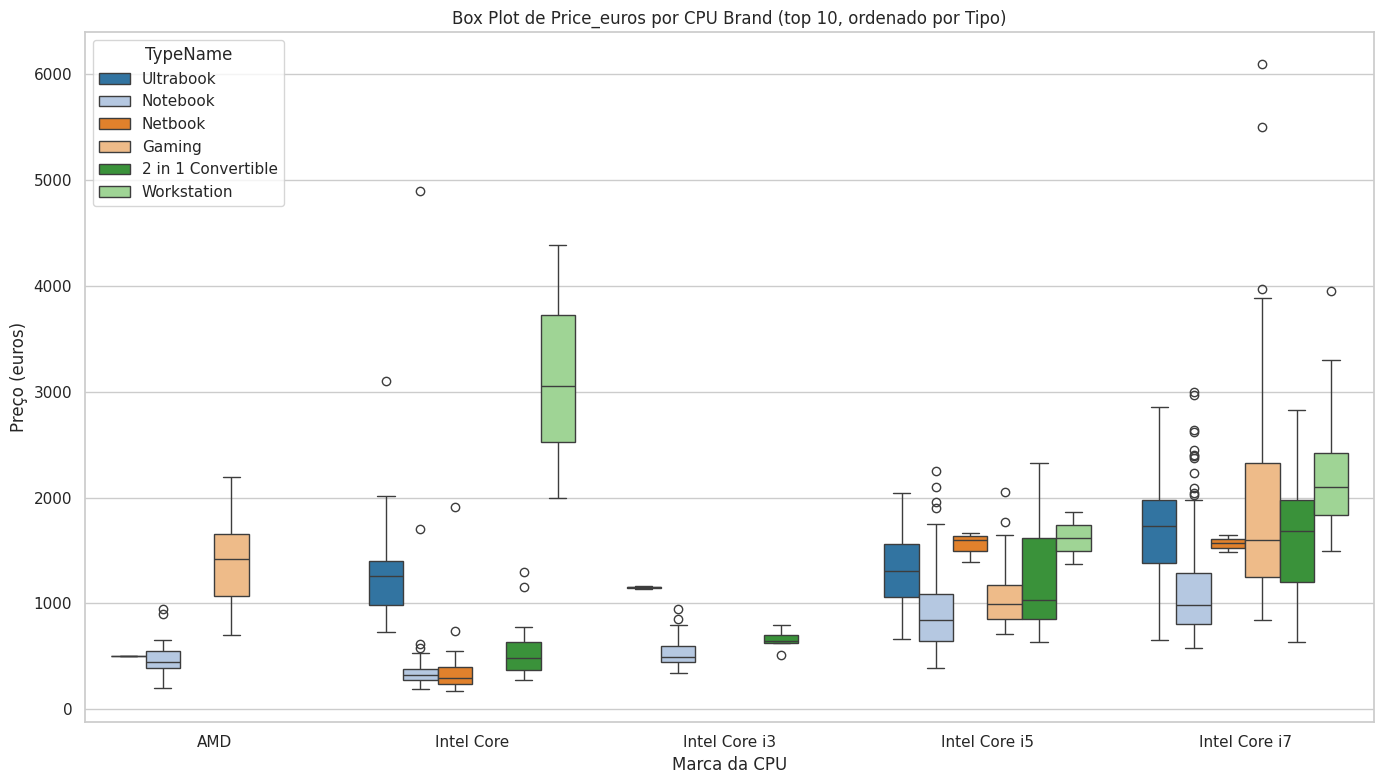

In [113]:
# @title Box Plot de Price_euros por Cpu_Base (Ordenado por Tipo e Geração)
y = "Price_euros" if "Price_euros" in df_prices_latop.columns else None
x = "CPU_Brand" if "CPU_Brand" in df_prices_latop.columns else None # Use the already created 'CPU_Brand'

if y and x:

    def get_cpu_order_key(cpu_name):
        parts = cpu_name.split()
        type_order = {'Core i3': 1, 'Core i5': 2, 'Core i7': 3, 'Core': 0, 'AMD': 5}.get(' '.join(parts[1:]), 0) # Order by type

        return (type_order, cpu_name)


    ordered_cpu_brands = sorted(df_prices_latop['CPU_Brand'].unique(), key=get_cpu_order_key)


    top_cpu_brands = df_prices_latop['CPU_Brand'].value_counts().head(10).index


    ordered_top_cpu_brands = [cpu for cpu in ordered_cpu_brands if cpu in top_cpu_brands]

    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df_prices_latop[df_prices_latop['CPU_Brand'].isin(ordered_top_cpu_brands)],
                x='CPU_Brand', y='Price_euros', order=ordered_top_cpu_brands, hue='TypeName', palette='tab20')
    plt.title(f"Box Plot de {y} por CPU Brand (top 10, ordenado por Tipo)");
    plt.xlabel("Marca da CPU")
    plt.ylabel("Preço (euros)")
    plt.tight_layout();
    plt.show()
else:
    print("Variáveis 'Price_euros' ou 'CPU_Brand' não encontradas no DataFrame.")

---
 - Conseguimos verificar que a os modelos geram impacto no preço do laptop, mas nos processadores Intel core, precisamos verificar, pois deve ter outros requeisitos de configuração sendo levados em consideração já que conseguimos verificar outliers.
 - Temos laptops com processadores i7 sendo os que apresentam preços mais elevados.

---

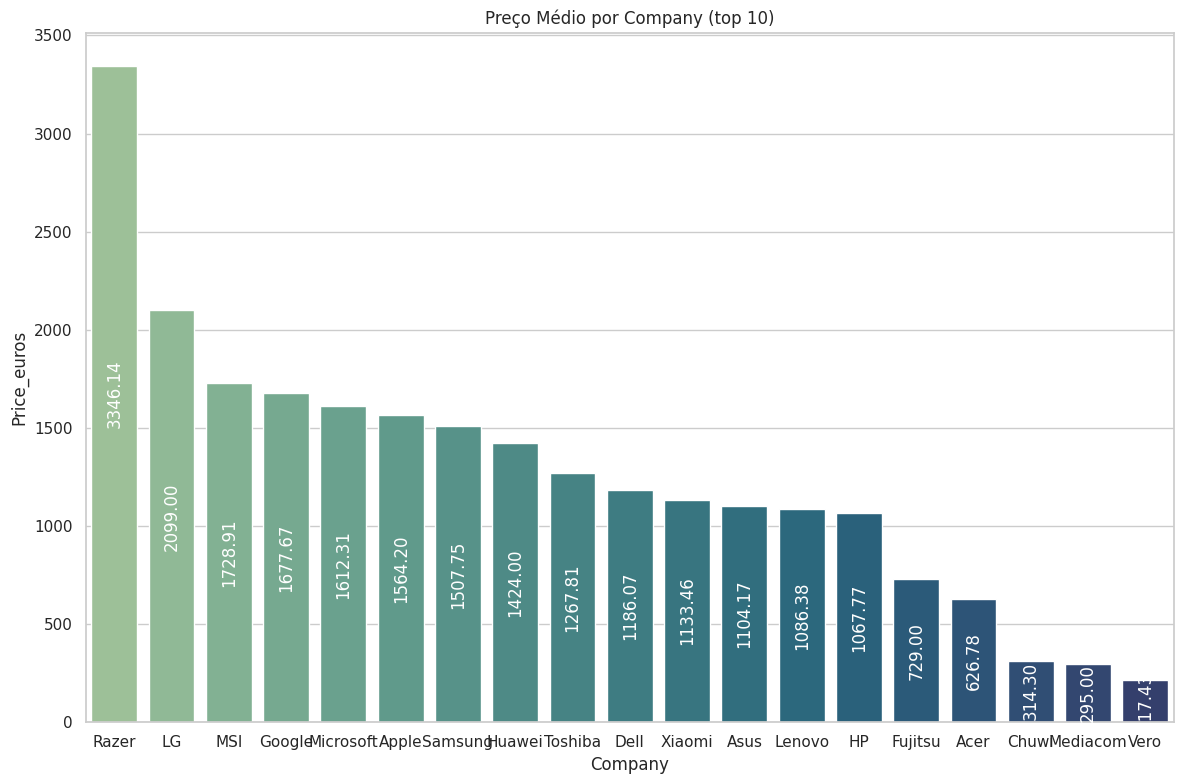

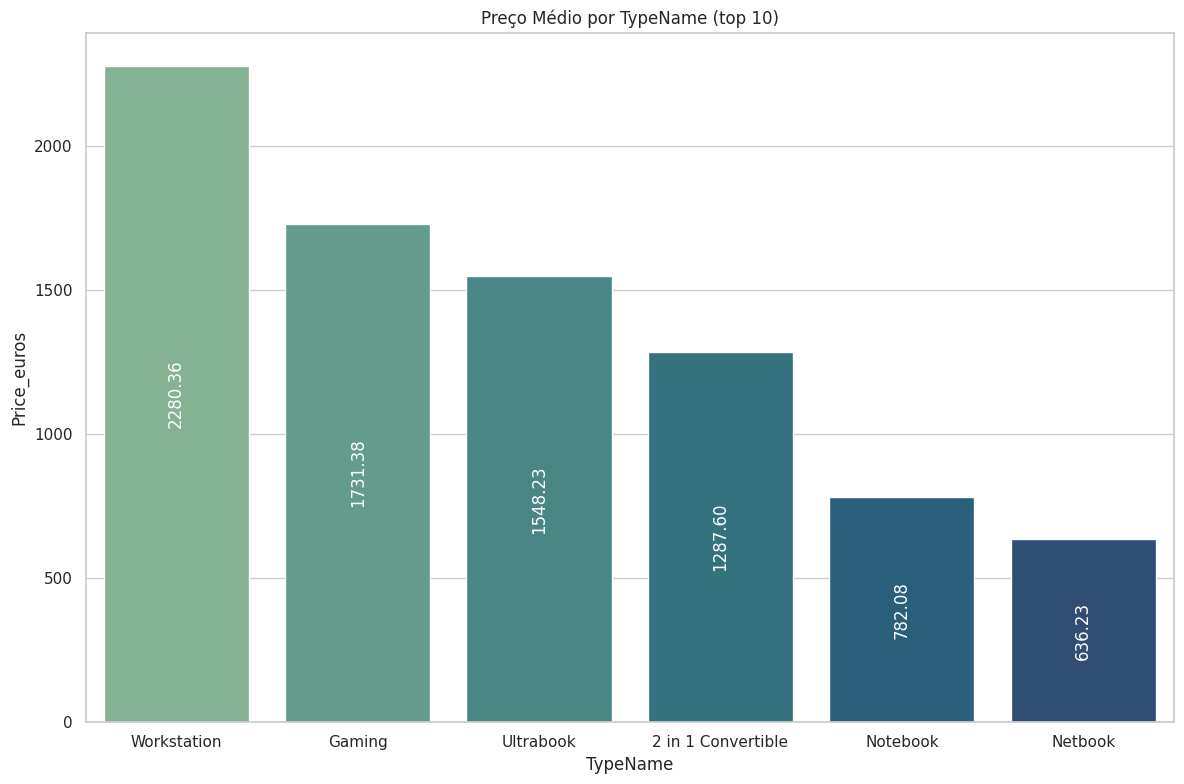

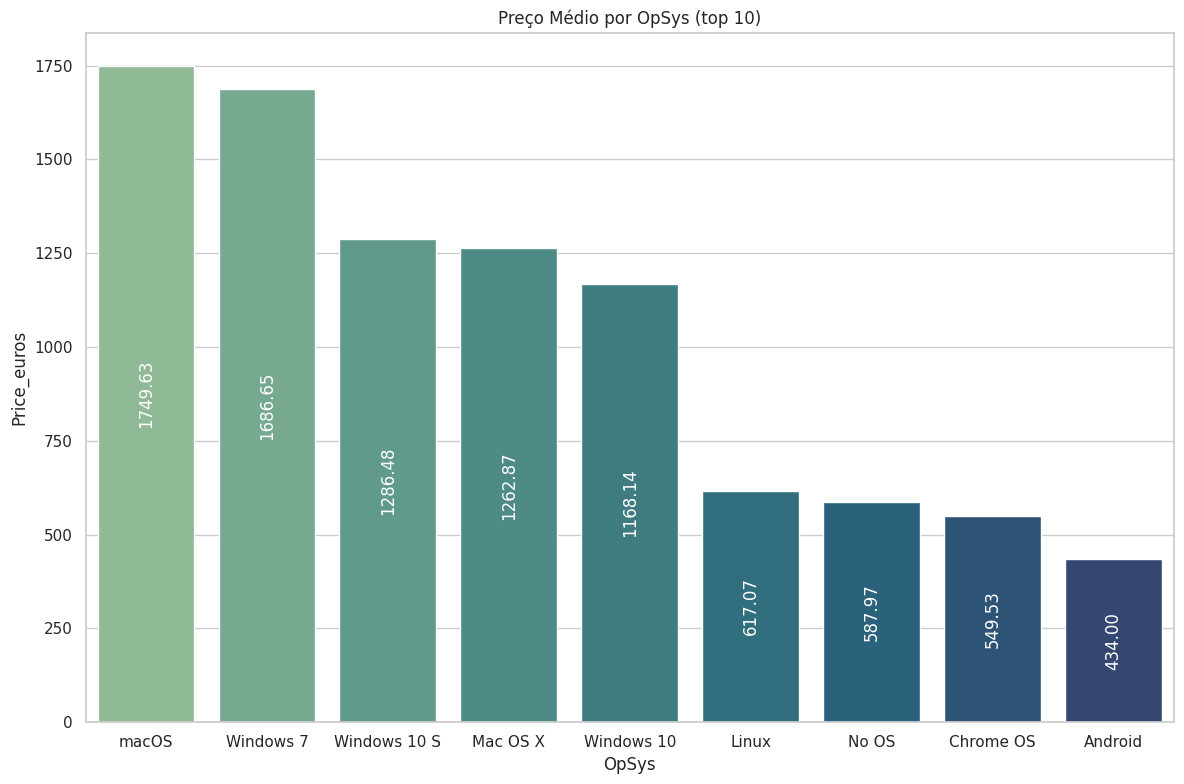

In [98]:
# @title Bar plots de preço médio por categorias (top N)
cat_for_price = [c for c in ["Company","TypeName","OpSys"] if c in df_prices_latop.columns and y]
for c in cat_for_price:

    top_categories = df_prices_latop[c].value_counts().head(20).index
    mean_price_by_category = df_prices_latop[df_prices_latop[c].isin(top_categories)].groupby(c)[y].mean().sort_values(ascending=False)

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=mean_price_by_category.index, y=mean_price_by_category.values, hue=mean_price_by_category.index, palette='crest', legend=False)
    plt.title(f"Preço Médio por {c} (top 10)");
    plt.xlabel(c)
    plt.ylabel(y)

    plt.tight_layout()


    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center', color='white', rotation=90)

    plt.show()

---

Análise de preços médio por marca
 - Conseguimos verificar que a marca razer tem o preço médio mais elevado, isso pode ocorrer pois a marca é especializada em laptops gamer, com configurações mais robustas, o que como vimos analisando as cpu pode aumentar os preços.
 - Segunda marca com maior preço médio é a LG, iremos fazer mais verificações que possam explicar esse comportamento.
 - Temos a maioria das marcar com preços na faixa dos 1000.00 euros.
 - Existem cinco marcas quem tem seus preços médio abaixo do 800.00 euros, tmabém iremos verificar.

---

---

Análise de preços médios por tipo de computador
 - Worstation tem a média de preços mais elevados. Não consegui verificar se o workstation citado no dataset, se trata do computador completo com gabinete e monitor.
 - Temos `Gaming`, `Ultrabook` e `2 in 1 convertible` com preços muito próximos, isso pode ocorrer pois estamos falando de laptop com construções e configurações que tendem a ser mais roubustas visando públicos específicos e com disposição financeira.
 - Notebook e netbooks tem preço médio abaixo de 1000.00 euros.


---

## Análise multivariada

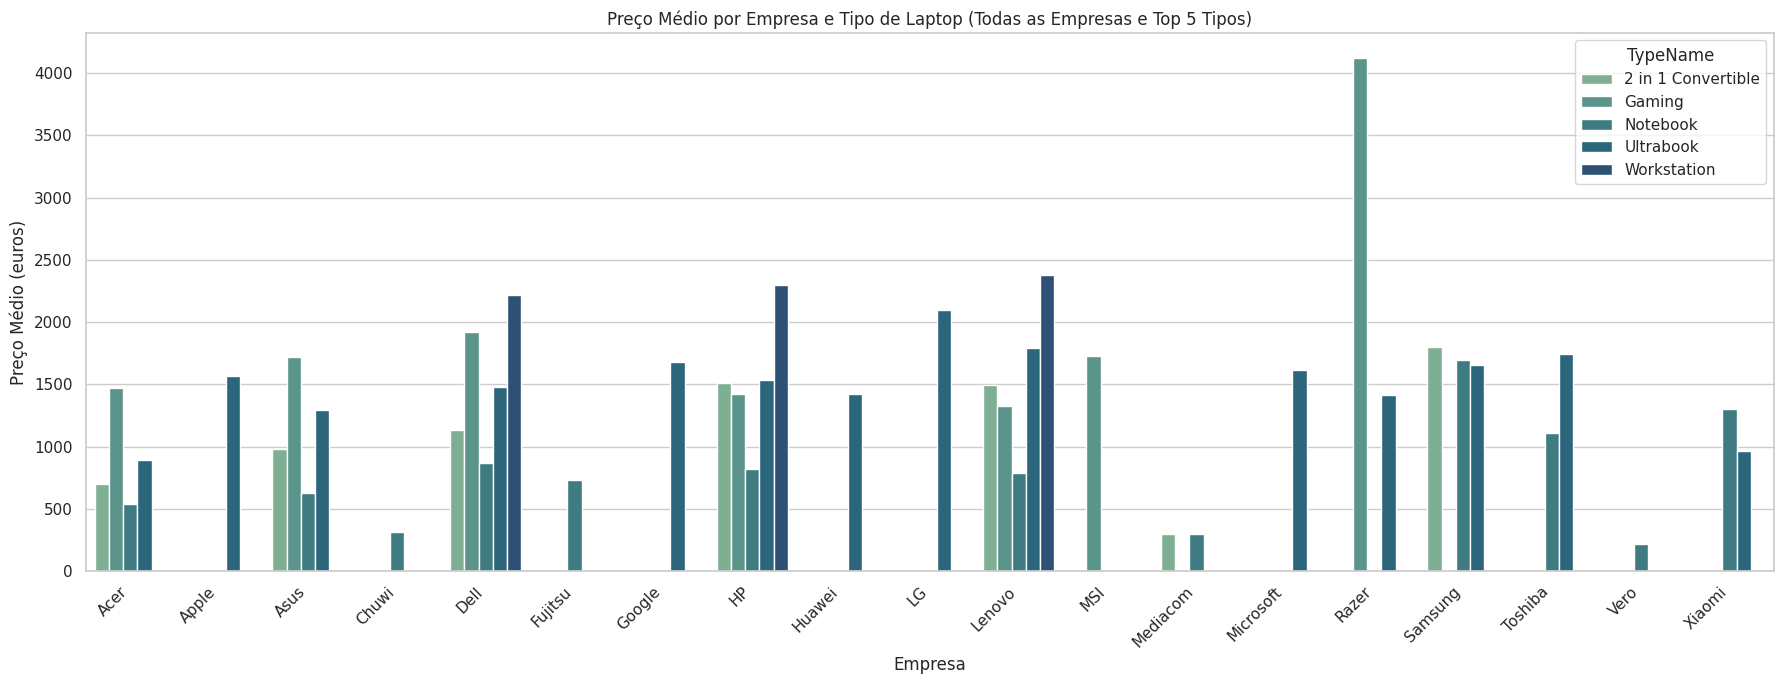

In [103]:
# @title Gráfico de barras agrupadas para Company, TypeName e Price_euros

n_typenames = 5

top_typenames = df_prices_latop['TypeName'].value_counts().head(n_typenames).index

df_filtered = df_prices_latop[
    (df_prices_latop['TypeName'].isin(top_typenames))
]

mean_price_grouped = df_filtered.groupby(['Company', 'TypeName'])['Price_euros'].mean().reset_index()


plt.figure(figsize=(18, 7))
sns.barplot(
    data=mean_price_grouped,
    x='Company',
    y='Price_euros',
    hue='TypeName',
    palette='crest'

)

plt.title(f'Preço Médio por Empresa e Tipo de Laptop (Todas as Empresas e Top {n_typenames} Tipos)');
plt.xlabel('Empresa');
plt.ylabel('Preço Médio (euros)');
plt.xticks(rotation=45, ha='right');
plt.tight_layout();
plt.show()

---

Análise de preços médio por por empresa e tipo de laptop
 - Observamos que as empresas que vendem `Workstation` tem seus preços médios maiores nessa categoria, como é verificado em empresas como `Dell`, `HP` e `Lenovo`
 - Exceto pela `HP` e `Lenovo` as demais empresas que contam com um linha Gaming, tem preços médios acima de 1500.00 euros, a `Acer` tem um valor médio abaixo para sua linha gaming, mas entre as demais linhas dessa marca a gaming é a com preço médio mais elevado.
 - `Razer` como tinhamos comentado anteriormente, tem a os computadores da sua linha gaming, com preços médio mais elevamos, iremos verificar as configurações, mas por se tratar de uma empresa com remomada nesse área isso pode gerar um preço agregado ao produto.
 - `Ultrabook` Tendem a ter preços mais elevados em praticamente todas as marcas, porém temos a `Samsung` como exceção, onde é observado preços médios com pouca variação entre `2 in 1 convertible`, `Ultrabook` e `Notebook`


---

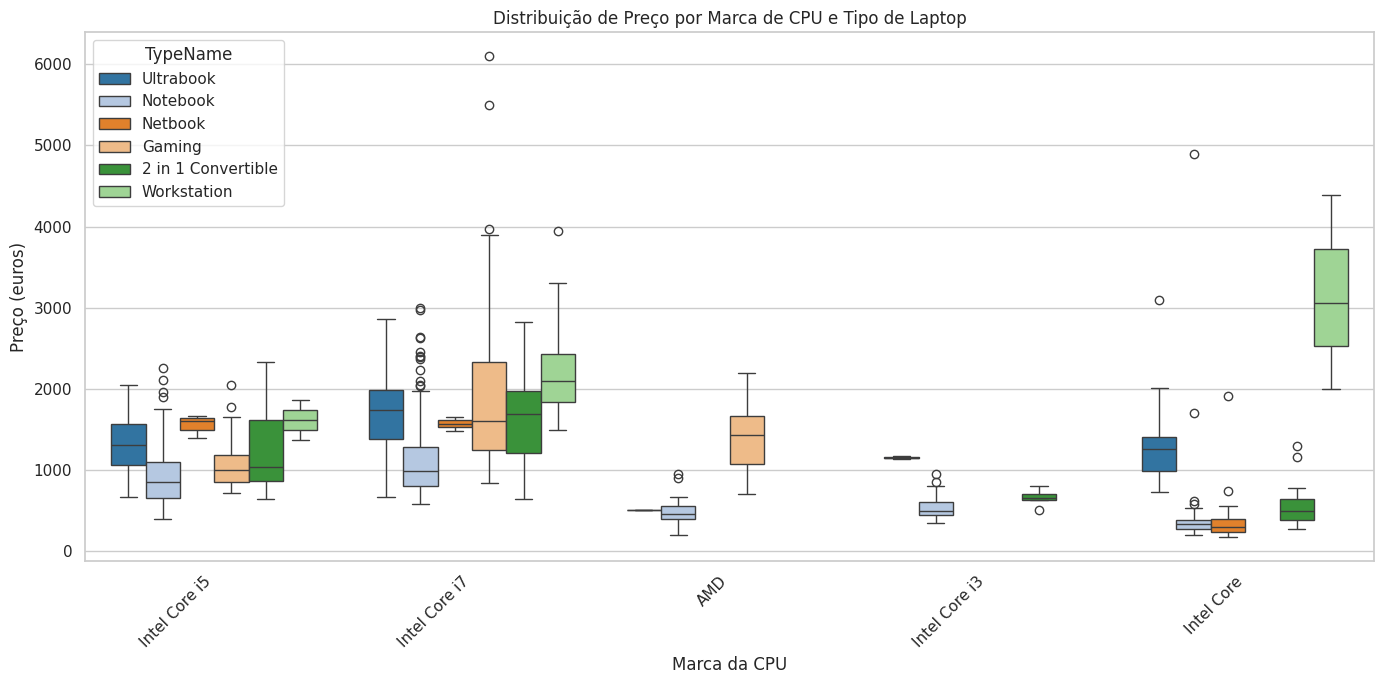

In [65]:
# @title Boxplot de Price_euros por CPU_Brand e TypeName

plt.figure(figsize=(14, 7))
sns.boxplot(data=df_prices_latop, x='CPU_Brand', y='Price_euros', hue='TypeName', palette='crest')

plt.title('Distribuição de Preço por Marca de CPU e Tipo de Laptop');
plt.xlabel('Marca da CPU');
plt.ylabel('Preço (euros)');
plt.xticks(rotation=45, ha='right');
plt.tight_layout();
plt.show()

---

## Sumário de insights e hipóteses
 -  `Dell`, `Lenovo` e `HP` são as marcas mais frequentes, também são as empresas que tem como carro-chefe a categoria `workstation`, que é a categoria com maior preço médio entre as demais catergorias dessas empresas. Isso pode ocorrer pois essa categoria é a mais adquirida por empresas.
 - Apesar de ser a categoria mais frenquente, `Notebook` não é a categoria com valor médio elevado, tendo preço médio abaixo dos 1000.00 euros.
 - Laptop com telas maiores constumam ser mais pesados e verifcamos uma elavação nos preços, mas não é decisivo, a `CPU` também é um fator para aumento dos preços médios, com verificamos com `Intel Core i7`.
 - `Ultrabook`, `Gaming`e `2 in 1 convertible` apresentam preços médios na faixa dos 1500.00 euros a 1800.00 euros, isso ocorre pois utilizam em sua processadores `Intel Core i5` ou `Intel Core i7`, além disso, estamos falando de laptop que tendem a ter construção mais robusta.
 - A Razer é uma empresa que apresenta preços bastante elevados na sua linha `Gaming`.
 - Samsung apresenta pouca variação de preço entre seus modelos `Ultrabook`, `Notebook` e `2 in 1 convertible`